In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('ratings.csv', names=column_names)

In [ ]:
df.head

<bound method NDFrame.head of         user_id  item_id  rating   timestamp
0             1       16     4.0  1217897793
1             1       24     1.5  1217895807
2             1       32     4.0  1217896246
3             1       47     4.0  1217896556
4             1       50     4.0  1217896523
...         ...      ...     ...         ...
105334      668   142488     4.0  1451535844
105335      668   142507     3.5  1451535889
105336      668   143385     4.0  1446388585
105337      668   144976     2.5  1448656898
105338      668   148626     4.5  1451148148

[105339 rows x 4 columns]>

In [ ]:
movie_titles = pd.read_csv("movie_titles.csv")
movie_titles.head

<bound method NDFrame.head of        item_id                                title
0            1                     Toy Story (1995)
1            2                       Jumanji (1995)
2            3              Grumpier Old Men (1995)
3            4             Waiting to Exhale (1995)
4            5   Father of the Bride Part II (1995)
...        ...                                  ...
10324   146684        Cosmic Scrat-tastrophe (2015)
10325   146878           Le Grand Restaurant (1966)
10326   148238       A Very Murray Christmas (2015)
10327   148626                 The Big Short (2015)
10328   149532  Marco Polo: One Hundred Eyes (2015)

[10329 rows x 2 columns]>

In [ ]:
df = pd.merge(df,movie_titles, on='item_id')
df.head

<bound method NDFrame.head of         user_id  item_id  rating   timestamp                        title
0             1       16     4.0  1217897793                Casino (1995)
1             9       16     4.0   842686699                Casino (1995)
2            12       16     1.5  1144396284                Casino (1995)
3            24       16     4.0   963468757                Casino (1995)
4            29       16     3.0   836820223                Casino (1995)
...         ...      ...     ...         ...                          ...
105334      668   140098     2.5  1450415424                Runoff (2015)
105335      668   140816     2.5  1443288791             Tangerine (2015)
105336      668   141472     2.5  1442679119  The 50 Year Argument (2014)
105337      668   142488     4.0  1451535844             Spotlight (2015)
105338      668   142507     3.5  1451535889        Pawn Sacrifice (2015)

[105339 rows x 5 columns]>

In [ ]:
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [ ]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Rome, Open City (a.k.a. Open City) (Roma, citt?perta) (1945)     5.0
Saddest Music in the World, The (2003)                           5.0
Barenaked in America (1999)                                      5.0
Traviata, La (1982)                                              5.0
Night of the Shooting Stars (Notte di San Lorenzo, La) (1982)    5.0
Name: rating, dtype: float64

In [ ]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                 325
Forrest Gump (1994)                 311
Shawshank Redemption, The (1994)    308
Jurassic Park (1993)                294
Silence of the Lambs, The (1991)    290
Name: rating, dtype: int64

In [ ]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Rome, Open City (a.k.a. Open City) (Roma, citt?perta) (1945)     5.0
Saddest Music in the World, The (2003)                           5.0
Barenaked in America (1999)                                      5.0
Traviata, La (1982)                                              5.0
Night of the Shooting Stars (Notte di San Lorenzo, La) (1982)    5.0
Name: rating, dtype: float64

In [ ]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),3.500
'Hellboy': The Seeds of Creation (2004),3.000
'Round Midnight (1986),2.500
'Til There Was You (1997),4.000
"'burbs, The (1989)",3.125


In [ ]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'71 (2014),3.500,1
'Hellboy': The Seeds of Creation (2004),3.000,1
'Round Midnight (1986),2.500,1
'Til There Was You (1997),4.000,3
"'burbs, The (1989)",3.125,20


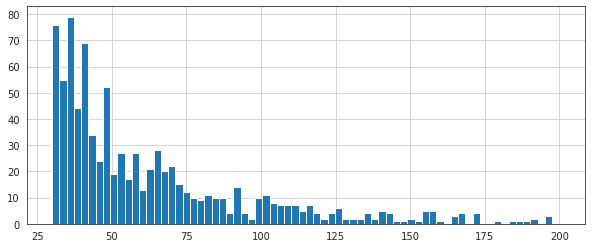

In [ ]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70, range=(30,200))

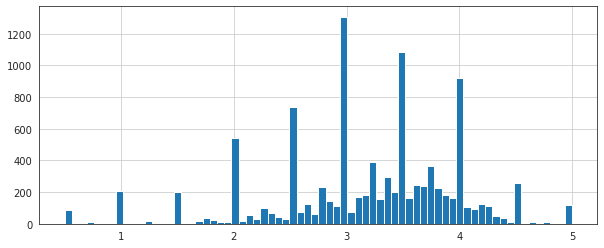

In [ ]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

In [ ]:
moviemat = df.pivot_table(index='user_id', columns='title', values='rating')
moviemat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),10 Items or Less (2006),10 Things I Hate About You (1999),10 to Midnight (1983),"10,000 BC (2008)",100 Girls (2000),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Reykjavik (101 Reykjav?) (2000),102 Dalmatians (2000),10th & Wolf (2006),"10th Kingdom, The (2000)",11-11-11 (11-11-11: The Prophecy) (2011),11:14 (2003),"11th Hour, The (2007)",12 (2007),12 Angry Men (1957),12 Angry Men (1997),12 Rounds (2009),12 Years a Slave (2013),127 Hours (2010),12:01 (1993),13 (2010),13 Assassins (J?an-nin no shikaku) (2010),13 Ghosts (1960),13 Going on 30 (2004),13 Rue Madeleine (1947),"13th Warrior, The (1999)",1408 (2007),1492: Conquest of Paradise (1992),15 Minutes (2001),...,Yu-Gi-Oh! (2004),Yves Saint Laurent (2014),Z (1969),Zabriskie Point (1970),Zach Galifianakis: Live at the Purple Onion (2006),Zack and Miri Make a Porno (2008),Zandalee (1991),Zapped! (1982),Zardoz (1974),Zathura (2005),Zatoichi and the Chest of Gold (Zatoichi senryo-kubi) (Zatoichi 6) (1964),Zebraman (2004),Zeitgeist: Addendum (2008),Zeitgeist: Moving Forward (2011),Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zero Day (2002),Zero Effect (1998),Zodiac (2007),Zombie Strippers! (2008),Zombieland (2009),Zone 39 (1997),Zookeeper (2011),Zoolander (2001),Zorba the Greek (Alexis Zorbas) (1964),"Zorro, the Gay Blade (1981)",Zozo (2005),Zu: Warriors from the Magic Mountain (Xin shu shan jian ke) (1983),Zulu (1964),[REC] (2007),[REC]? (2009),[REC]? 3 Genesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),iThree Amigos! (1986),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005)
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pulpfiction_user_ratings = moviemat['Pulp Fiction (1994)']
pulpfiction_user_ratings.head()

user_id
1    4.0
2    NaN
3    5.0
4    4.0
5    NaN
Name: Pulp Fiction (1994), dtype: float64

In [ ]:
similar_to_pulpfiction = moviemat.corrwith(pulpfiction_user_ratings)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [ ]:
corr_pulpfiction = pd.DataFrame(similar_to_pulpfiction, columns=['Correlation'])
corr_pulpfiction.dropna(inplace=True)
corr_pulpfiction.head()

,Correlation
title,
'Til There Was You (1997),1.000000
"'burbs, The (1989)",-0.475997
(500) Days of Summer (2009),0.076894
*batteries not included (1987),0.881917
...And Justice for All (1979),0.961524


In [ ]:
corr_pulpfiction.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
"Quiet, The (2005)",1.0
Absence of Malice (1981),1.0
Scooby-Doo 2: Monsters Unleashed (2004),1.0
After.Life (2009),1.0
Nightwatch (Nattevagten) (1994),1.0
Hero at Large (1980),1.0
"Hidden Fortress, The (Kakushi-toride no san-akunin) (1958)",1.0
Semi-Pro (2008),1.0
"Hills Have Eyes II, The (2007)",1.0


In [ ]:
corr_pulpfiction = corr_pulpfiction.join(ratings['num of ratings'])
corr_pulpfiction.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),1.000000,3
"'burbs, The (1989)",-0.475997,20
(500) Days of Summer (2009),0.076894,37
*batteries not included (1987),0.881917,11
...And Justice for All (1979),0.961524,10


In [ ]:
corr_pulpfiction[corr_pulpfiction['num of ratings']>80].sort_values('Correlation', ascending=False).head()

,Correlation,num of ratings
title,,
Pulp Fiction (1994),1.000000,325
Being John Malkovich (1999),0.542833,124
Kill Bill: Vol. 2 (2004),0.530735,91
Reservoir Dogs (1992),0.472520,131
Casino (1995),0.444799,84
